# Neural Network Image Processing

**Standard imports**

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
from pathlib import Path
from itertools import islice
%matplotlib inline

**Specify the top level folder with the labelled images**

In [165]:
# Mac:
# csv_root = Path('/Users/Neil/Dropbox/Documents/Apple and Python Scripts/F1 Image Labelling Py/07 Labelled Images/2018/GP03-Chin/3-McL China 2018 Day 4')
# csv_root = Path('/Users/Neil/Dropbox/Documents/Apple and Python Scripts/F1 Image Labelling Py/07 Labelled Images')

# Windows
# csv_root = Path(r'C:\Users\neil.cameron\OneDrive - McLaren Technology Group\07 Labelled Images\2018\GP03-Chin\3-McL China 2018 Day 4')
csv_root = Path(r'C:\Users\neil.cameron\OneDrive - McLaren Technology Group\07 Labelled Images')

# Digital Ocean:
# csv_root = Path('/home/neil/datascience/imagelbl/07 Labelled Images/2018/GP03-Chin/3-McL China 2018 Day 4')
# csv_root = Path('/home/neil/datascience/imagelbl/07 Labelled Images')

csv_lst = list(csv_root.glob('**/labeled_images.csv'))
print(len(csv_lst))
print(csv_lst[0])

47
C:\Users\neil.cameron\OneDrive - McLaren Technology Group\07 Labelled Images\2018\GP01-Astl\1-McL Australia 2018 Day 1\labeled_images.csv


**Function for reading each csv file and building a list of file paths and labels**

In [166]:
def read_file(load_file):
    '''
    Make some python lists of the paths and labels from an image labelling csv
    '''
    original_images_list = []
    scaled_images_list = []
    lbl_list_fr_file = []

    with open(load_file) as file:
        read_file = csv.reader(file, delimiter=',')
        for row in islice(read_file, 1, None):
            labels_content = row[3:][0].split(', ') # Take the comma separated values for label and split them into a list
            if labels_content[0]: # Only include images that have at least one label
                lbl_list_fr_file.append(labels_content)
                original_images_list.append(row[1])
                scaled_images_list.append(row[2])                
    return(original_images_list, scaled_images_list, lbl_list_fr_file)

In [167]:
original_images_list = []
scaled_images_list = []
lbl_list_fr_file = []

for file in csv_lst:    
    original_images_list_add, scaled_images_list_add, lbl_list_fr_file_add = read_file(file)
    original_images_list.extend(original_images_list_add)
    scaled_images_list.extend(scaled_images_list_add)
    lbl_list_fr_file.extend(lbl_list_fr_file_add)

In [168]:
# An example of the output in the labels list
print(len(scaled_images_list))
print(original_images_list[0])
print(scaled_images_list[0])
print(lbl_list_fr_file[0])

2229
\\mrl-plfile01\Aero\Track Photos\2018\GP01-Astl\3-McL Australia 2018 Day 3\07-Haas\_BT15743.JPG
C:\Users\neil.cameron\OneDrive - McLaren Technology Group\07 Labelled Images\2018\GP01-Astl\3-McL Australia 2018 Day 3\07-Haas\_BT15743.JPG
['Haas', 'Front_Suspension', 'Garage']


**Filter down the list of images and build an array of dictionary entries with paths to pictures for analysis vs labels**

In [169]:
# Set these arrays to filter the training images down to only specific matches
# ['Front_Wing', 'Rear_Wing', 'Chassis', 'Front_Suspension', 'Rear_Suspension', 'Floor', 'Engine', 'Maincase', 'Internals', 'Front_Brake_Duct', 'Rear_Brake_Duct', 'Ride_Height', 'Dead_Rear', 'Above', 'Garage', 'Track', 'Pick']
lbls_to_match = ['Ride_Height', 'Dead_Rear', 'Above', 'Track', 'Front_Wing', 'Rear_Wing']
teams_lst = ['Mercedes', 'Red_Bull', 'Ferrari', 'Force_India', 'Williams', 'McLaren', 'Haas', 'Torro_Rosso', 'Renault', 'Sauber']

# Translation dictionary from teams to ints
#dict = {'Mercedes':1, 'Red_Bull':2, 'Ferrari':3, 'Force_India':4, 'Williams':5, 'McLaren':6, 'Haas':7, 'Torro_Rosso':8, 'Renault':9, 'Sauber':0}
teams_dict_vals = list(range(1,10))
teams_dict_vals.append(0)
teams_dict = dict(zip(teams_lst, teams_dict_vals))

keys = ['Scaled Image Path', 'Team Name', 'Team']
path_label_dictlist = []

for i, item in enumerate(lbl_list_fr_file):
    if list(set(item).intersection(lbls_to_match)) and list(set(item).intersection(teams_lst)): # Only items with lables in common with the lbls_to_match
        team_name = list(set(item).intersection(teams_lst)) # Only lables that intersect with team labels
        team = teams_dict[team_name[0]]
        path_label_dictlist.append({keys[0]: scaled_images_list[i], keys[1]: team_name[0], keys[2]: team})
        
print(path_label_dictlist[1])
print(len(path_label_dictlist))

{'Scaled Image Path': 'C:\\Users\\neil.cameron\\OneDrive - McLaren Technology Group\\07 Labelled Images\\2018\\GP01-Astl\\3-McL Australia 2018 Day 3\\07-Haas\\_BT15787.JPG', 'Team Name': 'Haas', 'Team': 7}
945


**Make the image path independent of operating system**

In [170]:
def repath(path, csv_root):
    '''
    Take some hard-coded paths (like in a labeled images csv document) and point them to a new root. This is needed to run this script on different operating systems where the scaled images are stored in a different location than where the initial image labelling was done.
    '''    
    csv_root_lst = list(csv_root.parts)
    path_lst = list(Path(path).parts)
    remainder = Path(*[item for item in path_lst if item not in csv_root_lst])
    output_path = Path(csv_root, remainder)
    return output_path

In [171]:
print(path_label_dictlist[1])
for item in path_label_dictlist:
    item['Scaled Image Path'] = repath(item['Scaled Image Path'], csv_root)
print(path_label_dictlist[1])

{'Scaled Image Path': 'C:\\Users\\neil.cameron\\OneDrive - McLaren Technology Group\\07 Labelled Images\\2018\\GP01-Astl\\3-McL Australia 2018 Day 3\\07-Haas\\_BT15787.JPG', 'Team Name': 'Haas', 'Team': 7}
{'Scaled Image Path': WindowsPath('C:/Users/neil.cameron/OneDrive - McLaren Technology Group/07 Labelled Images/2018/GP01-Astl/3-McL Australia 2018 Day 3/07-Haas/_BT15787.JPG'), 'Team Name': 'Haas', 'Team': 7}


**Further resizing of image data and stack it as an np array**

In [172]:
from PIL import Image

im = Image.open(path_label_dictlist[1]['Scaled Image Path'])
#im.show()
print(im.format, im.size, im.mode) # Details before resize

JPEG (1000, 666) RGB


In [173]:
def resize(path, size):
    '''
    Scaled an image at a specific path down to a square of a specific size
    '''
    im = Image.open(path)
    resized = np.array(im.resize((size, size), resample=Image.LANCZOS))
    return resized

In [174]:
new_size = 50
im_stack = []
lbl_stack = []
for row in path_label_dictlist:
    im_stack.append(resize(Path(row['Scaled Image Path']), new_size))
    lbl_stack.append(row['Team'])
im_stack = np.array(im_stack)
lbl_stack = np.array(lbl_stack)

In [175]:
np.shape(im_stack)

(945, 50, 50, 3)

**Shuffle and train test split**

In [176]:
#np.random.shuffle(im_stack)

from sklearn.utils import shuffle
im_stack, lbl_stack = shuffle(im_stack, lbl_stack, random_state=0)
print(np.shape(im_stack))
print(np.shape(lbl_stack))

(945, 50, 50, 3)
(945,)


In [177]:
test_percent = 0.3
no_images = int(np.shape(im_stack)[0])
train_slice = int((1-test_percent)*no_images)
test_slice = no_images - train_slice
print(train_slice)
print(test_slice)

661
284


In [178]:
im_stack_train = im_stack[:train_slice]
lbl_stack_train = lbl_stack[:train_slice]
im_stack_test = im_stack[-test_slice:]
lbl_stack_test = lbl_stack[-test_slice:]
print('{0} and {1}'.format(str(np.shape(im_stack_train)), str(np.shape(lbl_stack_train))))

(661, 50, 50, 3) and (661,)


**Open an expample image**

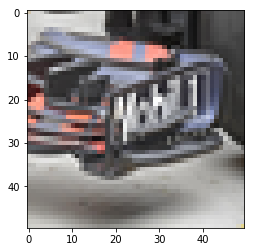

In [179]:
plt.imshow(im_stack[0])

**Helper functions**

In [180]:
def one_hot_encode(vec, vals=len(teams_lst)):
    '''
    One-hot encodes all of the possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [181]:
class ImageBatcher():
    
    def __init__(self):
        self.i = 0
        
        self.im_stack_train = im_stack_train
        self.lbl_stack_train = lbl_stack_train
        self.im_stack_test = im_stack_test
        self.lbl_stack_test = lbl_stack_test        
        
        print(np.shape(lbl_stack_train))
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        train_len = len(self.im_stack_train)
        self.im_stack_train = im_stack_train/255
        self.lbl_stack_train = one_hot_encode(lbl_stack_train)#, 10)
        
        print(np.shape(self.lbl_stack_train))
        
        print("Setting Up Test Images and Labels")
        test_len = len(self.im_stack_test)
        self.im_stack_test = im_stack_test/255
        self.lbl_stack_test = one_hot_encode(lbl_stack_test)#, 10)
                
    def next_batch(self, batch_size):
        x = self.im_stack_train[self.i:self.i+batch_size]
        y = self.lbl_stack_train[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.im_stack_train)
        return x, y

In [182]:
# Before Your tf.Session run these two lines
ib = ImageBatcher()
ib.set_up_images()

# During your session to grab the next batch use this line
# batch = ib.next_batch(100)

(661,)
Setting Up Training Images and Labels
(661, 10)
Setting Up Test Images and Labels


**Model helper functions**

In [183]:
import tensorflow as tf

In [184]:
x = tf.placeholder(tf.float32,shape=[None,new_size,new_size,3])
y_true = tf.placeholder(tf.float32,shape=[None,len(teams_lst)])

In [185]:
# Placeholder to hold a single probability for the dropout
hold_prob = tf.placeholder(tf.float32)

In [186]:
# Setup the network

def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    
    return tf.matmul(input_layer, W) + b

**Creating the Layers**

In [187]:
convo_1 = convolutional_layer(x,shape=[4,4,3,32]) # Size x size of filer, number of input channels, number of features out
print(np.shape(convo_1))
convo_1_pooling = max_pool_2by2(convo_1)
print(np.shape(convo_1_pooling))

(?, 50, 50, 32)
(?, 25, 25, 32)


In [188]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[4,4,32,64]) # Size x size of filer, number of input channels from previous layer, number of features out
print(np.shape(convo_2))
convo_2_pooling = max_pool_2by2(convo_2)
print(np.shape(convo_2_pooling))

(?, 25, 25, 64)
(?, 13, 13, 64)


In [189]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1, 13*13*64]) #108160]) # Fully connected output 13 x 13 x 64
print(np.shape(convo_2_flat))

(?, 10816)


In [190]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,512)) # Your choice of how many neurons in final layer
print(np.shape(full_layer_one))

(?, 512)


In [191]:
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)
print(np.shape(full_one_dropout))

(?, 512)


In [192]:
y_pred = normal_full_layer(full_one_dropout,10)
print(np.shape(y_pred))

(?, 10)


**Loss function and optimizer**

In [193]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [194]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

**Run**

In [195]:
init = tf.global_variables_initializer()

In [196]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(1600):
        batch = ib.next_batch(10)
        #print(np.shape(batch[0]))
        #print(np.shape(batch[1]))
        sess.run(train, feed_dict={x: batch[0], y_true: batch[1], hold_prob: 0.5})
        
        # Print progress every 100 steps
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:ib.im_stack_test, y_true:ib.lbl_stack_test, hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.105634


Currently on step 100
Accuracy is:
0.190141


Currently on step 200
Accuracy is:
0.348592


Currently on step 300
Accuracy is:
0.376761


Currently on step 400
Accuracy is:
0.40493


Currently on step 500
Accuracy is:
0.422535


Currently on step 600
Accuracy is:
0.461268


Currently on step 700
Accuracy is:
0.517606


Currently on step 800
Accuracy is:
0.489437


Currently on step 900
Accuracy is:
0.535211


Currently on step 1000
Accuracy is:
0.53169


Currently on step 1100
Accuracy is:
0.538732


Currently on step 1200
Accuracy is:
0.598592


Currently on step 1300
Accuracy is:
0.577465


Currently on step 1400
Accuracy is:
0.626761


Currently on step 1500
Accuracy is:
0.602113


